# Upgrade Fastai in Colab

In [ ]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

In [ ]:
from fastai.vision.all import *

# Download dataset

In [ ]:
import os

os.chdir('/content/')

!curl -L -s -o clusters.zip 'https://drive.google.com/uc?id=161k14V71N-Pn_jcQ0yO7-BD_flfPtaZ2&confirm=t'

!unzip -q clusters.zip

!rm clusters.zip

## Important: move test folder out of general path

In [ ]:
!mv ./clusters_mixed/test .

# Create training dataset

## Select training path

In [ ]:
path = "./clusters_mixed"
files = get_image_files( path )
len(files)

471

## Look at some file names

In [ ]:
files[0],files[6]

(Path('clusters_mixed/train/noise/scotland_58.11982_LAT_-6.38287_LON.png'),
 Path('clusters_mixed/train/noise/scotland_57.87288_LAT_-6.75203_LON.png'))

## Create data loader with 20% of training images for validation

In [ ]:
dls = ImageDataLoaders.from_folder(path, train='train', valid_pct=0.2, item_tfms=Resize(224))

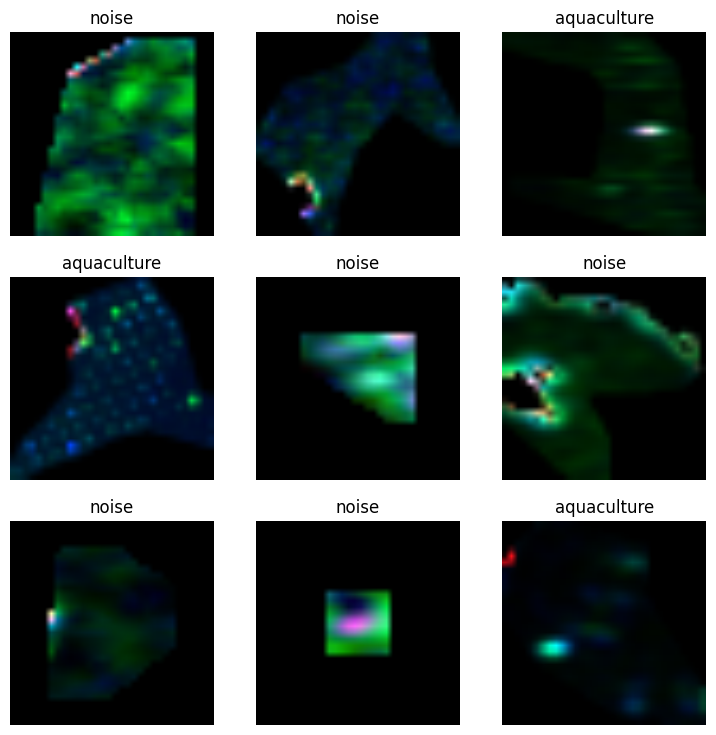

In [ ]:
dls.show_batch()

# Train a model

## Select model (learner)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd

## Find approppriate learning rate

SuggestedLRs(valley=0.0006918309954926372)

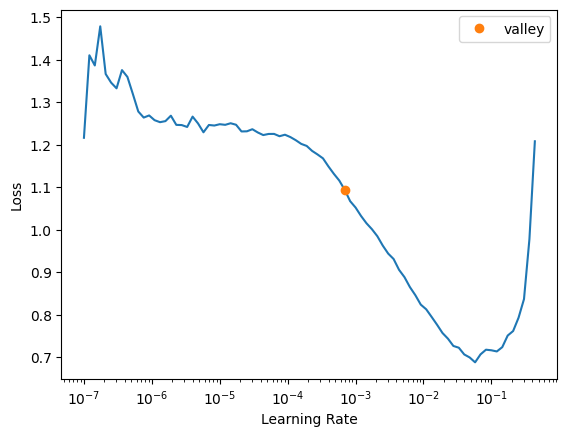

In [ ]:
learn.lr_find()

## Fine tune model

In [ ]:
learn.fine_tune(20, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.118832,0.935235,0.468085,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.730548,0.580363,0.287234,00:02
1,0.652257,0.450307,0.202128,00:02
2,0.564729,0.412299,0.159574,00:01
3,0.473823,0.344648,0.127660,00:01
4,0.407956,0.335445,0.138298,00:01
5,0.348179,0.351261,0.138298,00:01
6,0.301063,0.358679,0.127660,00:01
7,0.260469,0.358405,0.106383,00:02
8,0.226247,0.359794,0.106383,00:02
9,0.196241,0.355186,0.106383,00:01


## Check one file prediction

In [ ]:
learn.predict(files[0])

('noise', tensor(1), tensor([7.8209e-05, 9.9992e-01]))

## Show results on validation set

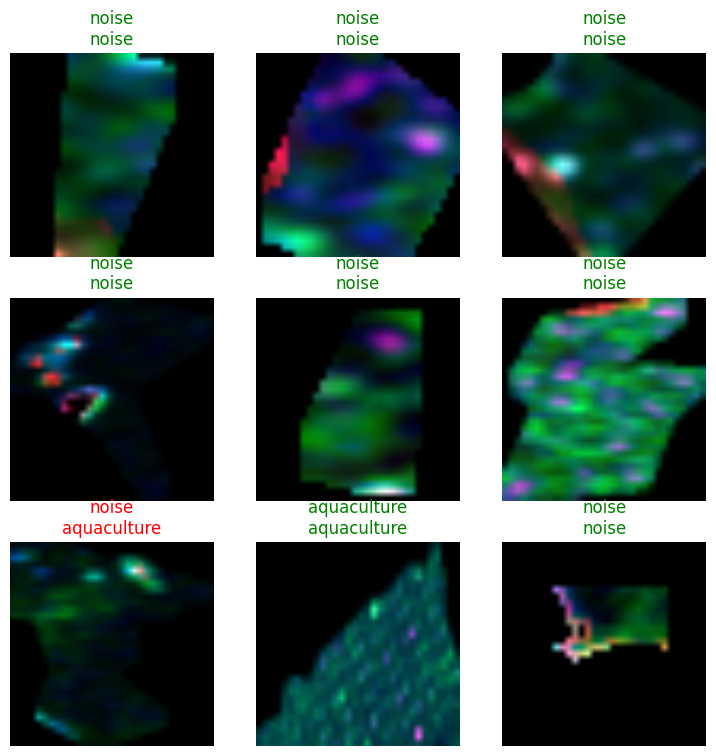

In [ ]:
learn.show_results()

##Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.confusion_matrix()

array([[44,  4],
       [ 6, 40]])

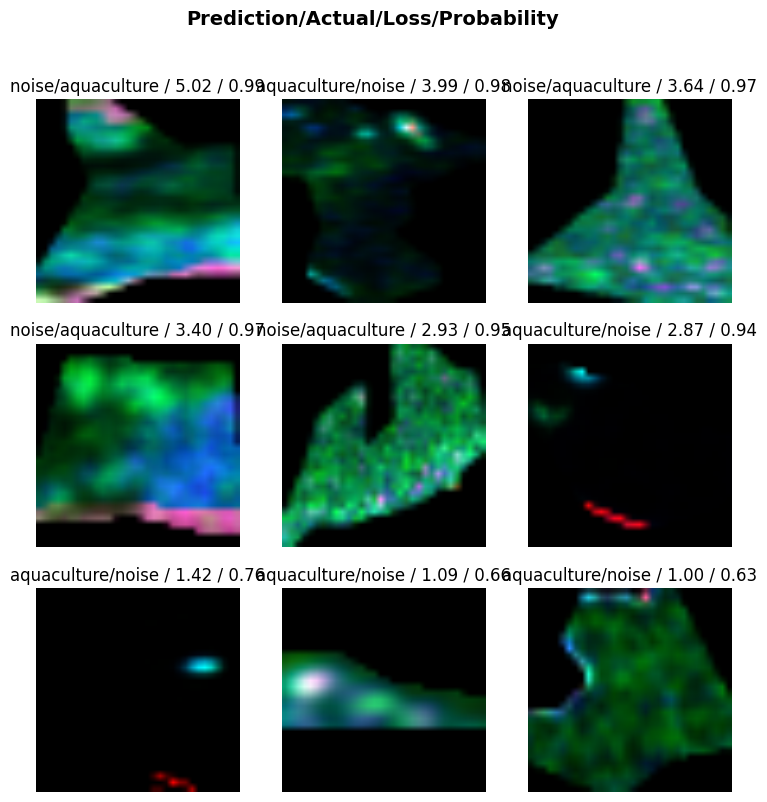

In [ ]:
interp.plot_top_losses(9)

# Test model on unseen data

## Calculate test accuracy

In [ ]:
tst_files = get_image_files("./test/")
print('Number of test files: %d ' % len(tst_files))

Number of test files: 68 


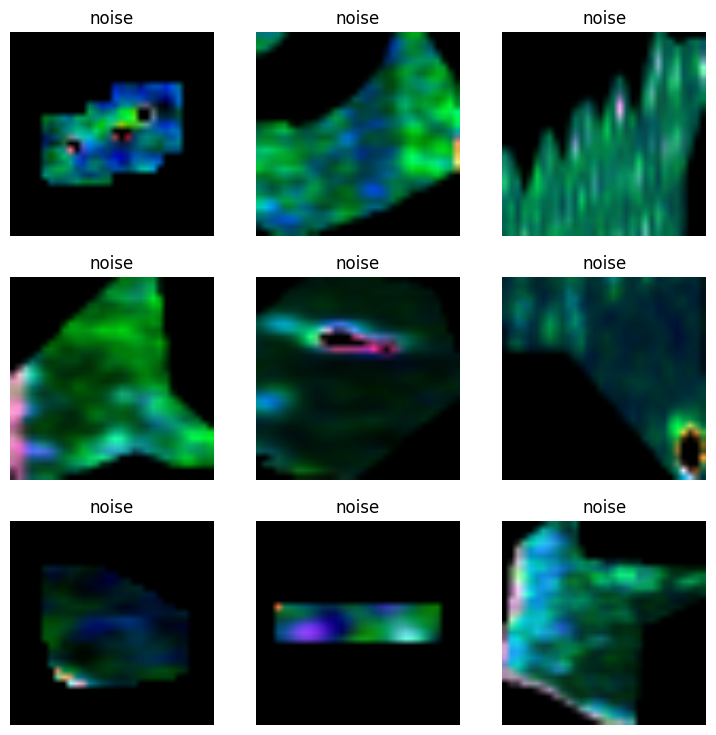

In [ ]:
tst_dl = dls.test_dl(tst_files, with_labels=True)
tst_dl.show_batch(max_n=9)

In [ ]:
preds, y = learn.get_preds(dl=tst_dl)
acc = accuracy(preds, y)
print('Test accuracy: %1.2f' % acc)

Test accuracy: 0.78


## Interpret test results

In [ ]:
interp = ClassificationInterpretation.from_learner(learn, dl=tst_dl)

In [ ]:
interp.confusion_matrix()

array([[27,  5],
       [10, 26]])

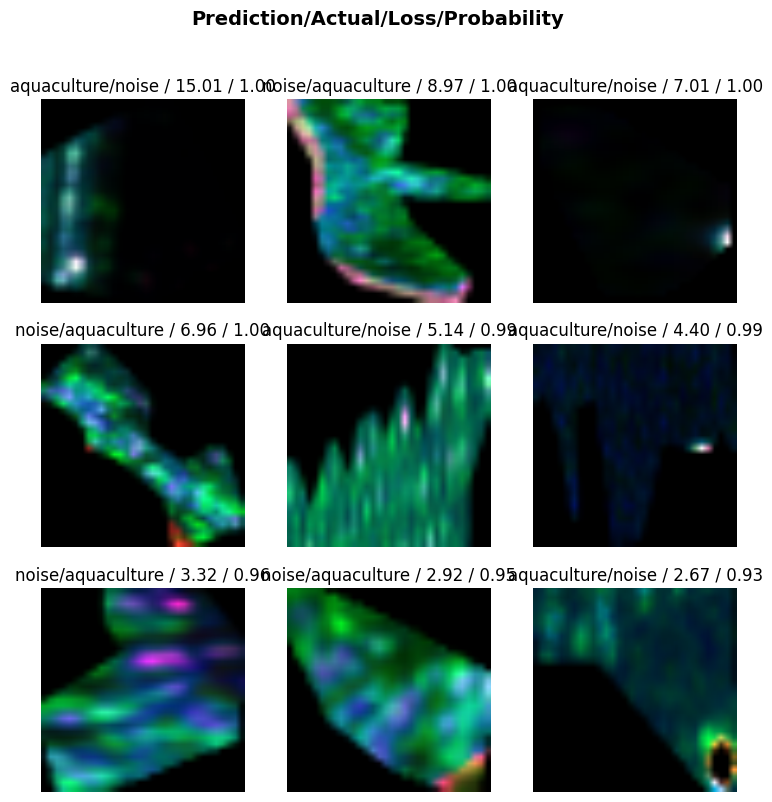

In [ ]:
interp.plot_top_losses(9)

In [ ]:
learn.save( 'resnet18_mixed', with_opt=False)

Path('clusters_mixed/models/resnet18_mixed.pth')